# AOS111 HW4

## Goal
- [ ] We will use the support vector regression model and random forest model to predict the burned area of forest fires in Northeast Portugal, continuing with the example we covered in the lectures.


Created by Donglai Ma, Nov 2020

## Data and task description

Use dataset of [forest fire data](https://archive.ics.uci.edu/ml/datasets/Forest+Fires), predict the burned area.

For more information, read [Cortez and Morais, 2007] and http://archive.ics.uci.edu/ml/datasets/Forest+Fires

X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: "jan" to "dec"

day - day of the week: "mon" to "sun"

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84

In [2]:
import pandas as pd
##### if you are using google colab, please uncomment the next 4 lines:
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# fire_base = pd.read_csv('/content/drive/My Drive/AOS111/forestfires.csv')
# If you load the file to your local drive, uncomment the following line:
fire_base = pd.read_csv('forestfires.csv')
fire_base

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
fire_base.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


array([[<AxesSubplot:title={'center':'area'}>]], dtype=object)

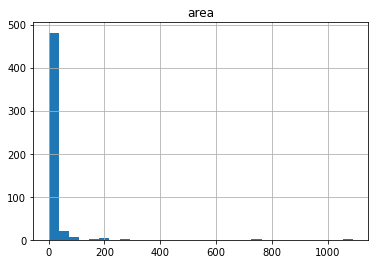

In [4]:
fire_base.hist('area',bins = 30)

### Data split and preprocess
From the area hist  plot, you can see that the burned are of the forest ranges from 0 ~ 1000 but the data distribution is highly non uniform.
To copmensate, predict the log of the burned area instead of area itself

In [5]:
import numpy as np
fire_base.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                         'aug', 'sep', 'oct', 'nov', 'dec'),
                        (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                        inplace=True)
fire_base.day.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'),
                      (1, 2, 3, 4, 5, 6, 7),
                      inplace=True)
fire_base['log_area'] = np.log10(fire_base['area']+1) # Plus 1 to avoid inf
fire_base




,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.871573
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1.742647
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.084934
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


In [6]:
# Split the data
from sklearn.model_selection import train_test_split
X_data=fire_base.drop(['area','log_area'],axis=1).values
y_data=fire_base['log_area'].values
y_data = y_data.reshape(-1,1)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)


### Task
We show a linear regression model below as an example of the workflow. **Your task is to use the SVR model and regression tree model to do the same thing:**
Specifically:
1. show the predicted (test) error
2. show the REC curve to see how the error is distributed

Here, we will try to compare the performance of different models on the same dataset. To do this, plot the different model REC curve together on the same plot so you can easily compare them. For fun (not required) you can also try other error analysis approaches.

The error metric used in the paper is the Regression Error Characteristic (REC) curve, which is a regression variant of the ROC curve in classification and plots the error tolerance on the X-axis versus the percentage of points predicted within that tolerance on the Y-axis.


Please remember that since the dataset is small, and the code above is randomly split (into a training and test set), so each time you run the model, the results could be quite different.


In [7]:
# REC curve
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [8]:
#### A linear model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
linear_reg = Ridge(alpha=1.0)
linear_reg.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))



y_pred=linear_reg.predict(X_test)
print("RMSE for linear regression:",np.sqrt(np.mean((y_test-y_pred)**2)))

RMSE for linear regression: 95.33433809650708


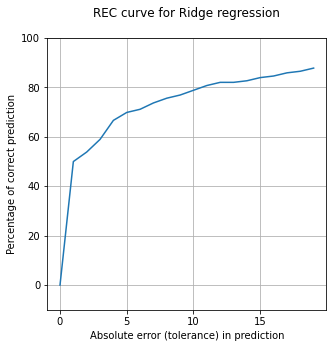

In [9]:
import matplotlib.pyplot as plt
tol_max = 20
rec_SVR=[]

for i in range(tol_max):
    rec_SVR.append(rec(y_pred,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for Ridge regression\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)
plt.show()

In [10]:
### Your model starts here